In [59]:
# WHAT DO WE WANT FROM THIS NOTEBOOK:
# - See distributions for different metrics
# - See averages and deviations for different metrics
# - See distributions for different team subsets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
# Get NBA data
playerData = pd.read_csv('NBAPlayerData/Players.csv')
playerStats = pd.read_csv('NBAPlayerData/Seasons_Stats.csv')

playerStats.rename(columns={'G':"gamesPlayed"}, inplace=True)

# Get the players that play since 2000
playerStats = playerStats[playerStats['Year']>=2000]
# Only look at players who have played more than 20 games
playerStats = playerStats[playerStats["gamesPlayed"]>30]
# Only look at players who have played more than minutes
playerStats = playerStats[playerStats["MP"]>300]
playerData = playerData[playerData['Player'].isin(playerStats['Player'])]

# Merge the datasets
playerStats = playerStats.merge(playerData, on="Player")

# Make some of the columns we need
playerStats['PPG'] = playerStats['PTS']/playerStats['gamesPlayed']
playerStats['PPM'] = playerStats['PTS']/playerStats['MP']
playerStats['AST_per_TOV'] = [playerStats['AST'].iloc[i]/playerStats['TOV'].iloc[i] if playerStats['TOV'].iloc[i]!=0 else np.nan for i in range(len(playerStats))]
playerStats['MP_per_PF'] = [playerStats["PF"].iloc[i]/playerStats["MP"].iloc[i] if playerStats['MP'].iloc[i]!=0 else np.nan for i in range(len(playerStats))]
playerStats['FTA_per_FGA'] = [playerStats["FTA"].iloc[i]/playerStats["FGA"].iloc[i] if playerStats['FGA'].iloc[i]!=0 else np.nan for i in range(len(playerStats))]
playerStats['MP_per_3PA'] = [playerStats["MP"].iloc[i]/playerStats["3PA"].iloc[i] if playerStats['3PA'].iloc[i]!=0 else np.nan for i in range(len(playerStats))]
playerStats['PTS_per_FGA'] = [playerStats["PTS"].iloc[i]/playerStats["FGA"].iloc[i] if playerStats['FGA'].iloc[i]!=0 else np.nan for i in range(len(playerStats))]

# Rename some columns
playerStats.rename(columns={"weight":"WEIGHT", "height":"HEIGHT"}, inplace=True)

# Fix some team names
playerStats.replace("NJN", "BRK", inplace=True)
playerStats.replace("NOH", "NOP", inplace=True)
playerStats.replace("CHA", "CHO", inplace=True)
playerStats.replace("CHH", "CHO", inplace=True)
playerStats.replace("VAN", "MEM", inplace=True)
playerStats.replace("SEA", "OKC", inplace=True)
playerStats.replace("NOK", "NOP", inplace=True)

# Drop players that got traded that season
playerStats = playerStats[playerStats.Tm!='TOT']

# Create the position columns
playerStats["G"] = [1 if "G" in playerStats['Pos'].iloc[i] else 0 for i in range(len(playerStats))]
playerStats["F"] = [1 if "F" in playerStats['Pos'].iloc[i] else 0 for i in range(len(playerStats))]
playerStats["C"] = [1 if "C" in playerStats['Pos'].iloc[i] else 0 for i in range(len(playerStats))]

# Fill in missing values
playerStats["3P%"] = playerStats['3P%'].fillna(0)
playerStats["FT%"] = playerStats['FT%'].fillna(0)
playerStats["MP_per_3PA"] = playerStats['MP_per_3PA'].fillna(np.mean(playerStats['MP_per_3PA']))
impute_mean_cols = ['AST_per_TOV', 'MP_per_PF', 'FTA_per_FGA', 'MP_per_3PA', 'PTS_per_FGA']
# for col in impute_mean_cols:
#     playerStats[col] = playerStats.fillna(np.mean(playerStats.loc[playerStats[col].isnull()==False]))[col]


# GET THE DRAFT DATA
data = pd.read_pickle("../Data/final_data1.df")
data.replace("New Jersey Nets", "Brooklyn Nets", inplace=True)
data.replace("New Orleans Hornets", "New Orleans Pelicans", inplace=True)
data.replace("Charlotte Bobcats", "Charlotte Hornets", inplace=True)
data.replace("LA Clippers", "Los Angeles Clippers", inplace=True)
data.replace("NJN", "BRK", inplace=True)
data.replace("NOH", "NOP", inplace=True)
data.replace("CHA", "CHO", inplace=True)
data.replace("CHH", "CHO", inplace=True)
data.replace("VAN", "MEM", inplace=True)
data.replace("SEA", "OKC", inplace=True)
data.replace("NOK", "NOP", inplace=True)

data.rename(columns={"Name":"Player", "Guard":"G", "Center":"C", "Forward":"F", 
                     "awardCount":"awards", "mock1":"m1", "mock2":"m2", "mock3":"m3", "mock4":"m4",
                     "mock5":"m5", "mock6":"m6"}, inplace=True)
data = data.drop_duplicates(subset=["Player"])
data["WM"] = [(data["EWA"].iloc[i]+data["WP"].iloc[i] + data["WS"].iloc[i])/3. for i in range(len(data))]
data.dropna(subset=["WM"], inplace=True)
data.reset_index(drop=True, inplace=True)
draftData = data.copy()



In [61]:
# Define the columns we want to cluster on 
simCols = ['FT%', '3P%', 'eFG%', 'ORB%', 'DRB%', 'AST%', 'TOV%', 'STL%', 'BLK%', 'USG%', 'OWS', 'DWS', 'FTA',
              '3PA', 'PTS', 'PF', 'MP_per_PF', 'FTA_per_FGA', 'MP_per_3PA', 'PTS_per_FGA',
              'C', 'F', 'G', 'PPM', 'PPG', 'HEIGHT', 'WEIGHT']

# Standard scale everything
from sklearn.preprocessing import StandardScaler
scaledData = playerStats.copy()
scaler = StandardScaler()
scaledData[simCols] = scaler.fit_transform(scaledData[simCols])

scaledDraft = draftData.copy()
scaler = StandardScaler()
scaledDraft[simCols] = scaler.fit_transform(scaledDraft[simCols])

# Make sure all the indexs are legit
scaledDraft.reset_index(drop=True, inplace=True)
scaledData.reset_index(drop=True, inplace=True)

euclidean ORL
euclidean MEM
euclidean ATL
euclidean POR
euclidean SAC
euclidean MIL
euclidean OKC
euclidean BOS
euclidean MIA
euclidean UTA
euclidean LAC
euclidean SAS
euclidean CHO
euclidean IND
euclidean HOU
euclidean NYK
euclidean CHI
euclidean NOP
euclidean DAL
euclidean BRK
euclidean DET
euclidean LAL
euclidean WAS
euclidean MIN
euclidean PHO
euclidean DEN
euclidean CLE
euclidean PHI
euclidean GSW
euclidean TOR
Normalizing ...
euclidean ORL
euclidean MEM
euclidean ATL
euclidean POR
euclidean SAC
euclidean MIL
euclidean OKC
euclidean BOS
euclidean MIA
euclidean UTA
euclidean LAC
euclidean SAS
euclidean CHO
euclidean IND
euclidean HOU
euclidean NYK
euclidean CHI
euclidean NOP
euclidean DAL
euclidean BRK
euclidean DET
euclidean LAL
euclidean WAS
euclidean MIN
euclidean PHO
euclidean DEN
euclidean CLE
euclidean PHI
euclidean GSW
euclidean TOR
Normalizing ...
euclidean ORL
euclidean MEM
euclidean ATL
euclidean POR
euclidean SAC
euclidean MIL
euclidean OKC
euclidean BOS
euclidean MIA
eu

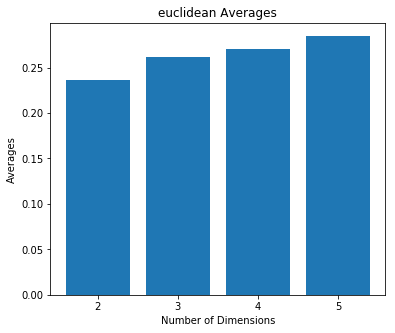

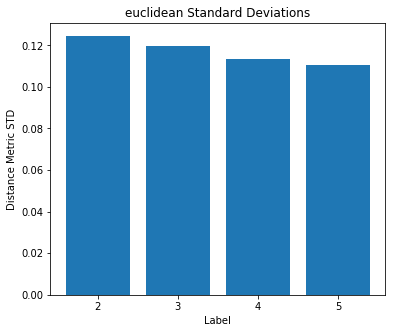

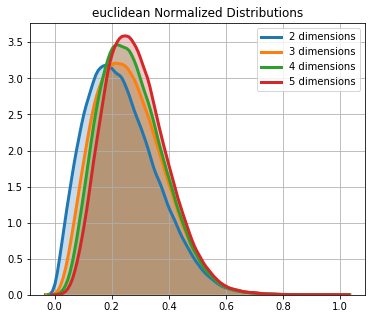

manhattan ORL
manhattan MEM
manhattan ATL
manhattan POR
manhattan SAC
manhattan MIL
manhattan OKC
manhattan BOS
manhattan MIA
manhattan UTA
manhattan LAC
manhattan SAS
manhattan CHO
manhattan IND
manhattan HOU
manhattan NYK
manhattan CHI
manhattan NOP
manhattan DAL
manhattan BRK
manhattan DET
manhattan LAL
manhattan WAS
manhattan MIN
manhattan PHO
manhattan DEN
manhattan CLE
manhattan PHI
manhattan GSW
manhattan TOR
Normalizing ...
manhattan ORL
manhattan MEM
manhattan ATL
manhattan POR
manhattan SAC
manhattan MIL
manhattan OKC
manhattan BOS
manhattan MIA
manhattan UTA
manhattan LAC
manhattan SAS
manhattan CHO
manhattan IND
manhattan HOU
manhattan NYK
manhattan CHI
manhattan NOP
manhattan DAL
manhattan BRK
manhattan DET
manhattan LAL
manhattan WAS
manhattan MIN
manhattan PHO
manhattan DEN
manhattan CLE
manhattan PHI
manhattan GSW
manhattan TOR
Normalizing ...
manhattan ORL
manhattan MEM
manhattan ATL
manhattan POR
manhattan SAC
manhattan MIL
manhattan OKC
manhattan BOS
manhattan MIA
ma

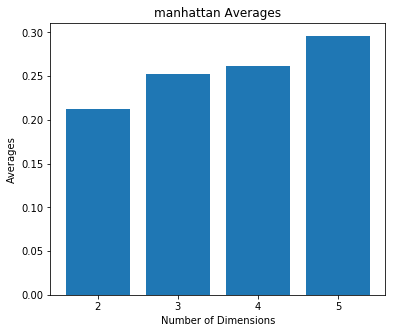

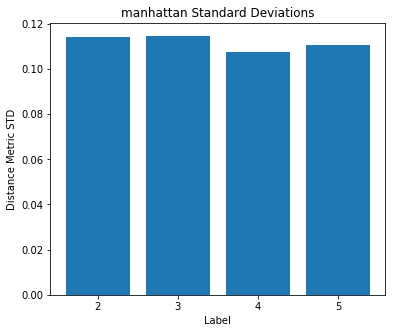

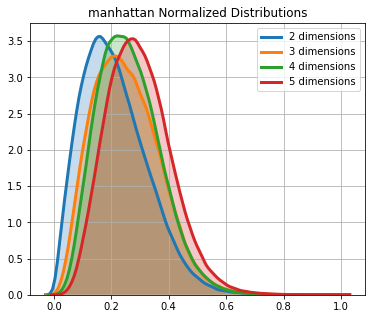

cosine ORL
cosine MEM
cosine ATL
cosine POR
cosine SAC
cosine MIL
cosine OKC
cosine BOS
cosine MIA
cosine UTA
cosine LAC
cosine SAS
cosine CHO
cosine IND
cosine HOU
cosine NYK
cosine CHI
cosine NOP
cosine DAL
cosine BRK
cosine DET
cosine LAL
cosine WAS
cosine MIN
cosine PHO
cosine DEN
cosine CLE
cosine PHI
cosine GSW
cosine TOR
Normalizing ...
cosine ORL
cosine MEM
cosine ATL
cosine POR
cosine SAC
cosine MIL
cosine OKC
cosine BOS
cosine MIA
cosine UTA
cosine LAC
cosine SAS
cosine CHO
cosine IND
cosine HOU
cosine NYK
cosine CHI
cosine NOP
cosine DAL
cosine BRK
cosine DET
cosine LAL
cosine WAS
cosine MIN
cosine PHO
cosine DEN
cosine CLE
cosine PHI
cosine GSW
cosine TOR
Normalizing ...
cosine ORL
cosine MEM
cosine ATL
cosine POR
cosine SAC
cosine MIL
cosine OKC
cosine BOS
cosine MIA
cosine UTA
cosine LAC
cosine SAS
cosine CHO
cosine IND
cosine HOU
cosine NYK
cosine CHI
cosine NOP
cosine DAL
cosine BRK
cosine DET
cosine LAL
cosine WAS
cosine MIN
cosine PHO
cosine DEN
cosine CLE
cosine PHI


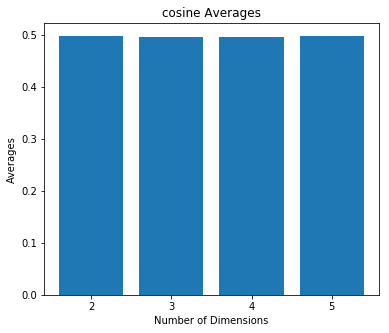

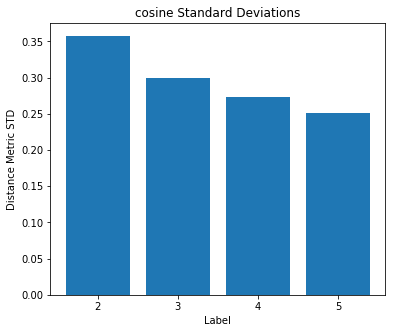

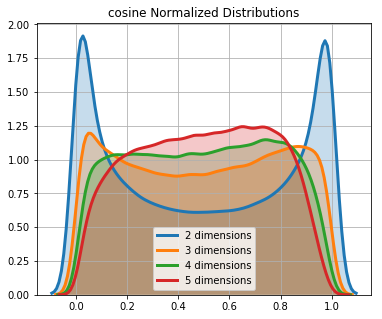

In [72]:
# Now we look at some pairs between draft players and teams
from sklearn.metrics import pairwise
from sklearn.decomposition import PCA
figsize = (6,5)
metrics = ['euclidean', "manhattan", "cosine"]
n_components = [2,3,4,5]


for metric_name in metrics:

    metric = pairwise.distance_metrics()[metric_name] # This is a function 
    distances = [np.zeros(len(NBAdec)*len(draftDec))-1 for i in range(len(n_components))]

    for n, n_component in enumerate(n_components):
        distanceCount = 0
        # Create our data
        pca = PCA(n_components=n_component)
        NBAdec = pca.fit_transform(scaledData[simCols])
#         pca = PCA(n_components=n_component)
#         draftDec = pca.fit_transform(scaledDraft[simCols])
        draftDec = pca.transform(scaledDraft[simCols])
        
        for team in scaledData['Tm'].unique():
            for year in scaledData["Year"].unique():
                teamYear_ids = scaledData[(scaledData["Tm"]==team) & (scaledData["Year"]==year)].index
                if len(teamYear_ids)>1:

                    # Get a draft player from the same yaer
                    draft_ids = scaledDraft[scaledDraft["Year"]==year].index
                    for i in range(len(draft_ids)):
                        draftee = draftDec[draft_ids[i]]
                        teamMate_ids = teamYear_ids # COMPUTE IT OVER EVERYONE ON THE TEAM

                        # Compute the metric over the team subset
                        for teamMate_id in teamMate_ids:
                            teamMate = NBAdec[teamMate_id]
                            dist = metric(draftee.reshape(1,-1), teamMate.reshape(1,-1))
                            distances[n][distanceCount] = dist
                            distanceCount += 1

            print(metric_name, team)
        # Remove all the -1s and normalize
        distances[n] = distances[n][distances[n]>0]
        print("Normalizing ...")
        maxDist = max(distances[n])
        distances[n] = [i/maxDist for i in distances[n]]
    
    # PLOT ALL OF THE STUFF FOR EACH METRIC
    N = len(distances)
    # Plot the distance means
    plt.figure(figsize=figsize)
    avgs = [np.mean(l) for l in distances]
    plt.bar(range(N), avgs)
    plt.xticks(range(N), n_components)
    plt.xlabel("Number of Dimensions")
    plt.ylabel("Averages")
    plt.title("{} Averages".format(metric_name))
    plt.show()

    # Plot the standard devations
    plt.figure(figsize=figsize)
    stds = [np.std(l) for l in distances]
    plt.bar(range(N), stds)
    plt.xticks(range(N), n_components)
    plt.xlabel("Label")
    plt.ylabel("Distance Metric STD")
    plt.title("{} Standard Deviations".format(metric_name))
    plt.show()

    # Plot the distributions
    plt.figure(figsize=figsize)
    for n in range(N):
        label = "{} dimensions".format(n_components[n])
        sns.distplot(distances[n], hist=False, kde=True, kde_kws={'shade':True, 'linewidth':3}, label=label)
    plt.grid()
    plt.title("{} Normalized Distributions".format(metric_name))
    plt.show()

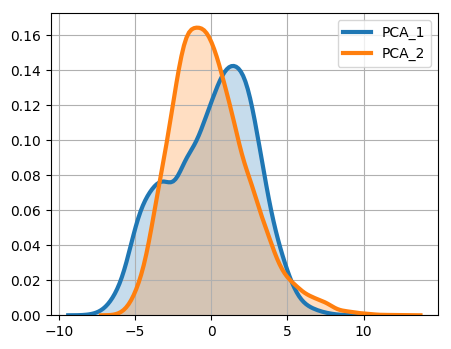

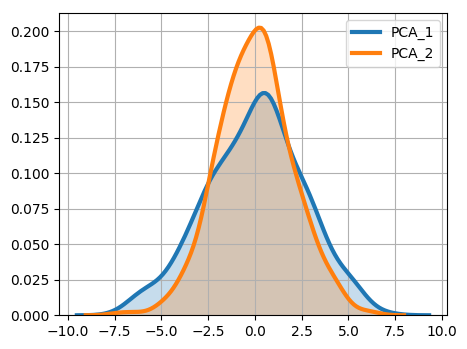

In [76]:
# Checking to see if this saddle makes sense
pca = PCA(n_components=2)
nbaDec = pca.fit_transform(scaledData[simCols])
plt.figure(figsize=(5,4), dpi=100)
sns.distplot(nbaDec[:,0], hist=False, kde=True, kde_kws={'shade':True, 'linewidth':3}, label="PCA_1")
sns.distplot(nbaDec[:,1], hist=False, kde=True, kde_kws={'shade':True, 'linewidth':3}, label="PCA_2")
plt.grid()
plt.show()

# pca = PCA(n_components=2)
draftDec = pca.transform(scaledDraft[simCols])
plt.figure(figsize=(5,4), dpi=100)
sns.distplot(draftDec[:,0], hist=False, kde=True, kde_kws={'shade':True, 'linewidth':3}, label="PCA_1")
sns.distplot(draftDec[:,1], hist=False, kde=True, kde_kws={'shade':True, 'linewidth':3}, label="PCA_2")
plt.grid()
plt.show()

